

# Linear Regression with Python

### Name: K Siddartha D Shetty

Linear Regression is a machine learning algorithm based on supervised learning. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

Linear regression performs the task to predict a dependent variable value Y based on a given independent variable X. In our task the two variables are Scores obtained by the student and number of hours students study.

For this task i will take help of libraries like numpy,pandas,seaborn and sklearn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns             #importing the required libraries

In [2]:
Student_scores = pd.read_csv('student_scores.csv')     #reading the csv file 

In [29]:
Student_scores.head()   #head() will provide details of first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
Student_scores.info()                  #information of the variables in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
Student_scores.describe()     # gives idea about measures of central tendency,measures of dispersion etc

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Understanding more about Variables and their Relation

kdeplot and rugplot are two good functions of visualising where the data is concentrated. Seaborn is a good library for data visualization applications.

the nature of graph for both study hours and marks scored are same indicating a strong corelation.We can use function named lmplot to show their corelation. The value of corelation lies between -1 and 1.

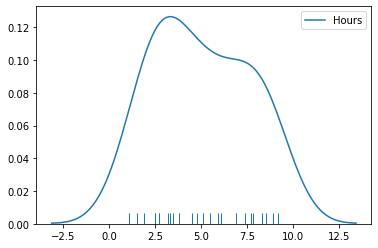

In [9]:
sns.kdeplot(Student_scores['Hours'])   
sns.rugplot(Student_scores['Hours'])

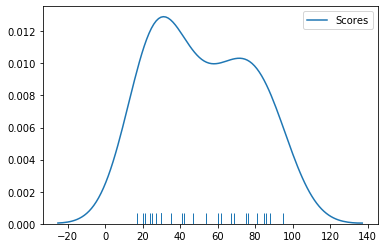

In [10]:
sns.kdeplot(Student_scores['Scores'])
sns.rugplot(Student_scores['Scores'])

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


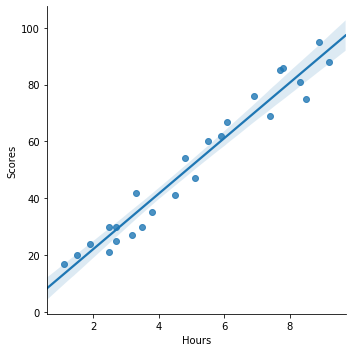

In [11]:
sns.lmplot(x='Hours',y='Scores',data=Student_scores)
Student_scores.corr()                                   #value of 0.97 indicates strong positive corelation

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the student's marks. Since both the variables are numerical, linear regression algorithm can be used.


In [14]:
X=Student_scores.iloc[:,:-1].values
y=Student_scores.iloc[:,1].values     # X and y arrays

### train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

### creating and training model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression(normalize=True)

In [20]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### model evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [21]:
print(reg.intercept_)     #value of intercept

2.8268923538997086


In [25]:
print(reg.coef_[0])       #value of coefficient

9.682078154455702


Interpreting the coefficients:

1 unit increase in study hours is associated with an 9.68 increase in marks scored.
    

### comparing actual and predicted value

In [26]:
y_prediction=reg.predict(X_test)

In [27]:
df=pd.DataFrame({'actual value':y_test,'Predicted value':y_prediction})
df

,actual value,Predicted value
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [31]:
test_hours=[[9.25]]
predict=reg.predict(test_hours)
print('no of hours spent studying = {} hours'.format(test_hours[0][0]))
print('Predicted Score of the student = {} marks'.format(predict[0].round(2)))

no of hours spent studying = 9.25 hours
Predicted Score of the student = 92.39 marks


# Regression Evaluation Metrics

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

Mean Squared Error (MSE) is the mean of the squared errors.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

All of these are loss functions, because we want to minimize them.

In [32]:
from sklearn import metrics

In [33]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test,y_prediction).round(2))
print('Mean squared error:', metrics.mean_squared_error(y_test,y_prediction).round(2))
print('Root mean square error:', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)).round(2))

Mean absolute error: 3.92
Mean squared error: 18.94
Root mean square error: 4.35
